# 기계학습 작업 흐름: 작업 흐름(workflow)

In [1]:
#step1 자료준비 단계
import numpy as np
data = np.genfromtxt('joydatanoise.txt')
print(data)   #해당 데이터를 slicing해서, 입력x와 클래스 y로 만들어야 한다.

[[-1.72 -3.12  1.  ]
 [ 0.31  1.85  1.  ]
 [ 1.56  2.85  1.  ]
 [ 2.64  2.41  1.  ]
 [ 1.23  2.54  1.  ]
 [ 1.33  2.03  1.  ]
 [ 1.26  2.68  1.  ]
 [ 2.58  1.79  1.  ]
 [ 2.4   0.91  1.  ]
 [ 0.51  2.44  1.  ]
 [ 2.17  2.64  1.  ]
 [ 3.38  2.94  1.  ]
 [ 1.09  3.12  1.  ]
 [ 0.68  1.43  1.  ]
 [ 3.76  0.64  1.  ]
 [ 0.73  2.97  1.  ]
 [ 0.53  2.94  1.  ]
 [ 1.49  1.25  1.  ]
 [ 3.92  3.48  1.  ]
 [ 3.87  2.91  1.  ]
 [ 1.14  3.01  1.  ]
 [ 1.73  2.8   1.  ]
 [ 2.96  1.84  1.  ]
 [ 2.61  2.92  1.  ]
 [ 2.28  0.9   1.  ]
 [ 1.93  3.71  1.  ]
 [ 1.26  1.17  1.  ]
 [ 1.9   1.34  1.  ]
 [ 3.13  0.92  1.  ]
 [ 0.85  1.46  1.  ]
 [ 1.5   3.93  1.  ]
 [ 2.95  2.09  1.  ]
 [ 0.76  2.84  1.  ]
 [ 1.    0.46  1.  ]
 [ 3.19  2.32  1.  ]
 [ 2.82  2.32  1.  ]
 [ 2.86  1.35  1.  ]
 [ 0.97  2.68  1.  ]
 [ 1.2   1.31  1.  ]
 [ 1.54  2.02  1.  ]
 [ 1.74  0.63  1.  ]
 [ 1.36 -0.22  1.  ]
 [ 2.63  0.4   1.  ]
 [ 0.9   2.05  1.  ]
 [ 1.26  2.54  1.  ]
 [ 0.71  2.27  1.  ]
 [ 1.96  0.83  1.  ]
 [ 2.52  1.83

In [2]:
# 학습단계
# 입력x와 클래스 y레이블을 만듭니다.
x = data[:, :2]
y = data[:, 2]
y = y.astype(np.int) # 실수형을 int형으로 바꿉니다.

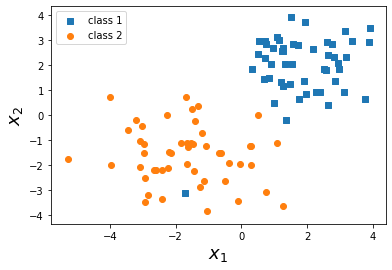

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(x[y == 1, 0], x[y == 1, 1], label = 'class 1', marker = 's')
plt.scatter(x[y == 0, 0], x[y == 0, 1], label = 'class 2', marker = 'o')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$x_2$', fontsize = 18)
plt.legend()
plt.show()

# 학습 자료 전처리 : 셔플링(Shuffling)

In [4]:
import numpy as np
data = np.genfromtxt('joydatanoise.txt')
#셔플링  --> x, y가 각자 따로 셔플링이 발생하면서 버그가 발생.. 따라서 data를 한꺼번에 셔플링
np.random.shuffle(data)
x,y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print(x[:5], y[:5])
print(x[-5:], y[-5:])


[[ 1.26  2.54]
 [ 0.9   2.05]
 [-0.68 -1.52]
 [ 2.76  2.82]
 [-1.08 -1.23]] [1 1 0 1 0]
[[ 0.51  2.44]
 [ 1.74  0.63]
 [-3.45 -0.62]
 [ 0.68  1.43]
 [ 1.73  2.8 ]] [1 1 0 1 1]


# 피쳐 스케일링(Feature Scaling)

In [5]:
xmax = np.max(x)
xmin = np.min(x)
# 정규화
x = (x-xmin)/(xmax-xmin)
print(x[:5,])

[[0.70978261 0.84891304]
 [0.67065217 0.79565217]
 [0.49891304 0.4076087 ]
 [0.87282609 0.87934783]
 [0.45543478 0.43913043]]


In [6]:
# 표준화

mu = x.mean(axis = 0)
sigma = x.std(axis = 0)
x = (x - mu) / sigma
print(x[:5,])

[[ 0.54931125  1.10632882]
 [ 0.38163951  0.87617635]
 [-0.35425313 -0.80064877]
 [ 1.24794351  1.23784452]
 [-0.54055506 -0.66443608]]


# 자료를 분리: training set, test set

In [7]:
import numpy as np
data = np.genfromtxt('joydatanoise.txt')
#셔플링  --> x, y가 각자 따로 셔플링이 발생하면서 버그가 발생.. 따라서 data를 한꺼번에 셔플링
np.random.seed(1)
np.random.shuffle(data)
x,y = data[:, :2], data[:, 2]
y = y.astype(np.int)

num = int(x.shape[0]*0.8)  # 100*0.8 = 80
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]


In [8]:
def perceptron_predict(X,w):
    z = np.dot(X,w)
    yhat = np.where(z>0., 1,0)
    return yhat

In [9]:
# version 0.1 train
w = [0.5, 1.0]
yhat = perceptron_predict(x_train, w)

missed = 0
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print('Misclassified: {}/{}'.
     format(missed, m_samples))

Misclassified: 2/80


In [10]:
#version 0.2 train
w = [0.5, 1.0]
yhat = perceptron_predict(x_train, w)
missed = np.sum(yhat.flatten()!= y_train)
print('Misclassified: {}/{}'.
     format(missed, m_samples))

Misclassified: 2/80


In [11]:
# version 2를 가지고 test를 해보자

w = [0.5, 1.0]
yhat = perceptron_predict(x_test, w)
missed = np.sum(yhat.flatten()!= y_test)
print('Misclassified: {}/{}'.
     format(missed, m_samples))


Misclassified: 0/80


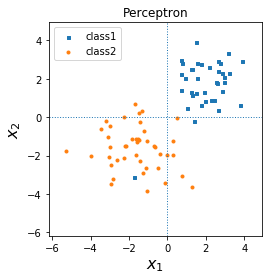

In [17]:
%run plot_xyw.py
plot_xyw(x_train, y_train)

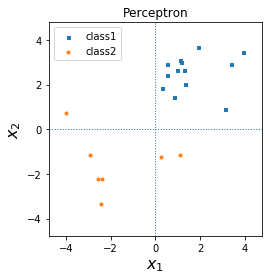

In [19]:
plot_xyw(x_test,y_test)

In [20]:
x_train[:5]

array([[-2.64, -2.2 ],
       [-2.97, -1.53],
       [ 1.  ,  0.46],
       [-2.84, -3.22],
       [-0.05, -1.95]])